# Marine Biodiversity and Environmental Data Exploration with `mlcroissant`
This notebook provides a guide for loading and exploring a dataset using the `mlcroissant` library.

### Dataset Source
The dataset source is provided via a Croissant schema URL.

In [1]:
import mlcroissant as mlc
import pandas as pd
import matplotlib.pyplot as plt

from tabulate import tabulate
from IPython.display import Markdown

## 1. Data Loading
Load metadata and records from the dataset using `mlcroissant`.

In [2]:
# Define the dataset URL
url = 'https://dev.senscience.cloud/portal/10.82843/pm80-mh77/fair2.json'

# Load the dataset metadata
dataset = mlc.Dataset(url)
metadata = dataset.metadata.to_json()
print(f"{metadata['name']}: {metadata['description']}")

Borja_2024_Marine_Biodiversity_Environmental_Data_Dataset: This dataset encompasses extensive long-term monitoring data from the Basque Country, focusing on assessing the responsiveness of 83 environmental variables across water, sediment, biota, phytoplankton, macroinvertebrates, and fish. It includes metadata and biodiversity data from various aquatic environments, detailing site-specific identifiers, sampling methods, and instruments used. The dataset is crucial for understanding trends in environmental quality and the effects of human pressures and management actions over time.


## 2. Data Overview
Review available record sets, fields, and their IDs.

In [3]:
# Format the list column as a Markdown-compatible string
def format_list_column(row):
    if isinstance(row, list):
        return "\n".join(f"- {item}" for item in row)  # Bullet point list
    return str(row)

In [4]:
# List all the record sets available in the dataset
df = pd.DataFrame(metadata["recordSet"])
columns_to_keep = {
    "@id": "Record Set ID",
    "description": "Description"
}
df = df[list(columns_to_keep.keys())]
df = df.rename(columns=columns_to_keep)

# Convert DataFrame to Markdown table
markdown_table = tabulate(df, headers="keys", tablefmt="pipe", showindex=False)

# Render the table as Markdown in Jupyter
display(Markdown(markdown_table))

| Record Set ID                                                                                                           | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
|:------------------------------------------------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| https://senscience.ai/frontiers/borja/README.csv                                                                        | The datasheet encompasses metadata and biodiversity data related to diverse aquatic environments. It includes information on taxonomic groups, site-specific sampling identifiers, sampling methods, and descriptions of instruments used. Examples include fish and Gillnetting, with references to specific sites like LTER_400. The data covers various descriptive fields such as taxonomic classification, site, and method details, providing a comprehensive overview of aquatic biodiversity research.                                                                            |
| https://senscience.ai/frontiers/borja/METADATA.csv                                                                      | The datasheet contains metadata about environmental sampling in the Bay of Biscay, Spain. It details locations (site names and IDs), geographical coordinates, and timespan of data collection from 1989 to 2023. It categorizes samples into taxa groups and provides protocols for sampling. Contact information for involved researchers is included, listing names and emails. The dataset covers various taxa such as water, macroalgae, and invertebrates, and is collected consistently across multiple years and sites.                                                           |
| https://senscience.ai/frontiers/borja/WATER.csv                                                                         | The dataset contains water quality measurements, including parameters like temperature, salinity, dissolved oxygen, and pH, collected from various sites. It includes metadata such as date collected, site ID, sample ID, and record basis. The dataset also provides depth information and sampling effort, with parameter values and standard units. The data spans multiple years, with repeated observations for several parameters across different locations.                                                                                                                      |
| https://senscience.ai/frontiers/borja/BIOTA.csv                                                                         | The dataset captures biota sample information, detailing collection dates, locations, sample IDs, and species (taxonomy) names with corresponding IDs. It includes environmental parameters measured in biota, the units of these measurements, and specific measurement values. The dataset uniformly records specimens as "Frozen Specimen" from intertidal zones, with consistent sampling efforts noted. Key taxa include "Mytilus galloprovincialis," "Magallana gigas," and "Magallana angulata." It offers insight into biotic composition and related environmental observations. |
| https://senscience.ai/frontiers/borja/SEDIMENTS.csv                                                                     | The dataset captures sediment samples with details on collection dates, site IDs, and sample IDs. It includes metadata such as basis of record, depth measurements, and sampling effort. Key parameters measured include organic matter percentage, gravel, mud, and metal concentrations, alongside redox potential, with respective values and standard units. The dataset provides insights into sediment composition and characteristics across various sites and depths, offering valuable information for environmental and geological studies.                                     |
| https://senscience.ai/frontiers/borja/PHYTOPLANKTON.csv                                                                 | The dataset records phytoplankton abundance, collected at various sites on specific dates, identified by unique sample IDs. It includes taxonomic information, depth measurements, and consistent recording effort. All observations, based on material samples, use standardized units and focus on abundance parameters, providing insights into phytoplankton distribution across different locations and times. The dataset is comprehensive, with no missing values, facilitating detailed ecological studies and analysis.                                                          |
| https://senscience.ai/frontiers/borja/MACROALGAE.csv                                                                    | The dataset contains macroalgae observations, detailing collection dates, site identifiers, sample identifiers, and taxonomic data. Observations are consistently recorded as human observations in intertidal zones, with a constant sampling effort and depth range. Each entry includes a taxon name and ID, with coverage percentages as measured parameters, all standardized in percentage units. The data provides a comprehensive record of macroalgae coverage across various sites over time.                                                                                   |
| https://senscience.ai/frontiers/borja/INVERTEBRATES.csv                                                                 | The datasheet documents invertebrate abundance across various sites and dates, detailing parameters like site ID, sample ID, taxonomic names, and their corresponding IDs. It includes metadata such as depth, sampling effort, and records classified as "MaterialSample." The dataset captures both minimum and maximum depths, with a consistent unit of "Ind/m2" for parameter values, focusing on invertebrate sampling efforts and abundance.                                                                                                                                       |
| https://senscience.ai/frontiers/borja/FISH.csv                                                                          | The datasheet contains data on fish abundance collected from various sites over a span of years. It includes details like site IDs, sample IDs, collection dates, and taxonomic information. Depth measurements, both minimum and maximum, are recorded along with sampling efforts. The observations are categorized under a "HumanObservation" record type and parameterized by abundance with values expressed in two unit variations, "Ind" and "ind".                                                                                                                                |
| https://senscience.ai/frontiers/borja/METHOD.csv                                                                        | The datasheet contains information on environmental sampling protocols, detailing various taxa groups like sediments, water, and biota, alongside the instruments used, sampling protocols, and references to related documentation. Descriptions provide insights into the sampling frequency and methodology in different environments, such as coastal and estuarine areas. The data offers metadata linked to scientific studies and protocols, emphasizing the procedural aspects of environmental monitoring.                                                                       |
| https://senscience.ai/frontiers/borja/AUTHORS.csv                                                                       | The datasheet contains information about authors, including their last names, first names, and middle initials. It includes details on whether they are in the author list, their email addresses, ORCID identifiers, and affiliations with departments and institutions. Additionally, it provides institutional details such as street addresses, city, zip code, and country. Most authors are affiliated with AZTI and are based in Spain, with Pasaia being a frequent city of affiliation.                                                                                          |
| https://api.dev.senscience.cloud/frontiers/8704cfcf-0667-4eaf-b0b1-679597df683f-16/1f815237-2720-4af1-8a91-0a68ec18fef2 | The datasheet provides analytical data on various environmental subgroups, detailing chemical parameters and their respective units. It includes information on analysis methods and codes, capturing diverse testing techniques like gas chromatography and mass spectrometry. The fields cover distinct categories such as sediments, water, and biota, and feature alphanumeric codes for specific chemicals or compounds analyzed. The datasheet appears to structure metadata essential for understanding environmental chemical analysis.                                           |

## 3. Data Extraction
Load data from a specific record set into a DataFrame for analysis. Use the record set and field `@id`s from the overview.

In [5]:
record_set_ids = [
    'https://senscience.ai/frontiers/borja/PHYTOPLANKTON.csv',
    'https://senscience.ai/frontiers/borja/INVERTEBRATES.csv',
    'https://senscience.ai/frontiers/borja/MACROALGAE.csv',
    'https://senscience.ai/frontiers/borja/FISH.csv'
]

dataframes = {
    record_set_id: pd.DataFrame(list(dataset.records(record_set=record_set_id)))
    for record_set_id in record_set_ids
}

for name, df in dataframes.items():
    display(Markdown(f"#### {name}"))
    display(df.head())
    display(Markdown("---"))

#### https://senscience.ai/frontiers/borja/PHYTOPLANKTON.csv

,https://senscience.ai/frontiers/borja/PHYTOPLANKTON.csv/datecollected,https://senscience.ai/frontiers/borja/PHYTOPLANKTON.csv/siteid,https://senscience.ai/frontiers/borja/PHYTOPLANKTON.csv/sampleid,https://senscience.ai/frontiers/borja/PHYTOPLANKTON.csv/basisofrecord,https://senscience.ai/frontiers/borja/PHYTOPLANKTON.csv/minimumdepthinmeters,https://senscience.ai/frontiers/borja/PHYTOPLANKTON.csv/maximumdepthinmeters,https://senscience.ai/frontiers/borja/PHYTOPLANKTON.csv/taxaname,https://senscience.ai/frontiers/borja/PHYTOPLANKTON.csv/taxanameid,https://senscience.ai/frontiers/borja/PHYTOPLANKTON.csv/samplingeffort,https://senscience.ai/frontiers/borja/PHYTOPLANKTON.csv/parameter,https://senscience.ai/frontiers/borja/PHYTOPLANKTON.csv/parameter_value,https://senscience.ai/frontiers/borja/PHYTOPLANKTON.csv/parameter_standardunit
0,2002-04-22,b'E-BI10',b'E-BI10_20020422',b'MaterialSample',0.0,0.5,b'Cryptomonas',106282.0,b'125 ml',b'Abundance',4.20,b'cel/ml'
1,2002-04-22,b'E-BI10',b'E-BI10_20020422',b'MaterialSample',0.0,0.5,b'Eutreptiella',17657.0,b'125 ml',b'Abundance',170.00,b'cel/ml'
2,2002-04-22,b'E-BI10',b'E-BI10_20020422',b'MaterialSample',0.0,0.5,b'Melosira varians',149043.0,b'125 ml',b'Abundance',0.24,b'cel/ml'
3,2002-04-22,b'E-BI10',b'E-BI10_20020422',b'MaterialSample',0.0,0.5,b'Melosira\xc2\xa0nummuloides',149044.0,b'125 ml',b'Abundance',1.28,b'cel/ml'
4,2002-04-22,b'E-BI10',b'E-BI10_20020422',b'MaterialSample',0.0,0.5,b'Navicula',149142.0,b'125 ml',b'Abundance',94.00,b'cel/ml'


---

#### https://senscience.ai/frontiers/borja/INVERTEBRATES.csv

,https://senscience.ai/frontiers/borja/INVERTEBRATES.csv/datecollected,https://senscience.ai/frontiers/borja/INVERTEBRATES.csv/siteid,https://senscience.ai/frontiers/borja/INVERTEBRATES.csv/sampleid,https://senscience.ai/frontiers/borja/INVERTEBRATES.csv/basisofrecord,https://senscience.ai/frontiers/borja/INVERTEBRATES.csv/minimumdepthinmeters,https://senscience.ai/frontiers/borja/INVERTEBRATES.csv/maximumdepthinmeters,https://senscience.ai/frontiers/borja/INVERTEBRATES.csv/taxaname,https://senscience.ai/frontiers/borja/INVERTEBRATES.csv/taxanameid,https://senscience.ai/frontiers/borja/INVERTEBRATES.csv/samplingeffort,https://senscience.ai/frontiers/borja/INVERTEBRATES.csv/parameter,https://senscience.ai/frontiers/borja/INVERTEBRATES.csv/parameter_value,https://senscience.ai/frontiers/borja/INVERTEBRATES.csv/parameter_standardunit
0,2010-01-20,b'E-A5',b'E-A5_20100120',b'MaterialSample',b'Intertidal',b'Intertidal',b'Potamopyrgus antipodarum',147123.0,b'0.25 m2 * 3',b'Abundance',5.33,b'Ind/m2'
1,2013-01-30,b'E-A5',b'E-A5_20130130',b'MaterialSample',b'Intertidal',b'Intertidal',b'Trematoda',19948.0,b'0.25 m2 * 3',b'Abundance',1.33,b'Ind/m2'
2,2016-01-26,b'E-A5',b'E-A5_20160126',b'MaterialSample',b'Intertidal',b'Intertidal',b'NEMERTEA',152391.0,b'0.25 m2 * 3',b'Abundance',1.00,b'Ind/m2'
3,2019-01-21,b'E-A5',b'E-A5_20190121',b'MaterialSample',b'Intertidal',b'Intertidal',b'NEMERTEA',152391.0,b'0.25 m2 * 3',b'Abundance',3.00,b'Ind/m2'
4,2021-03-15,b'E-A5',b'E-A5_20210315',b'MaterialSample',b'Intertidal',b'Intertidal',b'NEMERTEA',152391.0,b'0.25 m2 * 3',b'Abundance',1.00,b'Ind/m2'


---

#### https://senscience.ai/frontiers/borja/MACROALGAE.csv

,https://senscience.ai/frontiers/borja/MACROALGAE.csv/datecollected,https://senscience.ai/frontiers/borja/MACROALGAE.csv/siteid,https://senscience.ai/frontiers/borja/MACROALGAE.csv/sampleid,https://senscience.ai/frontiers/borja/MACROALGAE.csv/basisofrecord,https://senscience.ai/frontiers/borja/MACROALGAE.csv/minimumdepthinmeters,https://senscience.ai/frontiers/borja/MACROALGAE.csv/maximumdepthinmeters,https://senscience.ai/frontiers/borja/MACROALGAE.csv/taxaname,https://senscience.ai/frontiers/borja/MACROALGAE.csv/taxanameid,https://senscience.ai/frontiers/borja/MACROALGAE.csv/samplingeffort,https://senscience.ai/frontiers/borja/MACROALGAE.csv/parameter,https://senscience.ai/frontiers/borja/MACROALGAE.csv/parameter_value,https://senscience.ai/frontiers/borja/MACROALGAE.csv/parameter_standardunit
0,2002-05-22,b'M-EA1',b'M-EA1_20020522',b'HumanObservation',b'Intertidal',b'Intertidal',b'Enteromorpha sp.',144294.0,b'0.25 m2',b'Coverage',37.5,b'%'
1,2005-06-06,b'M-EA1',b'M-EA1_20050606',b'HumanObservation',b'Intertidal',b'Intertidal',b'Enteromorpha sp.',144294.0,b'0.25 m2',b'Coverage',87.5,b'%'
2,2008-06-03,b'M-EA1',b'M-EA1_20080603',b'HumanObservation',b'Intertidal',b'Intertidal',b'Enteromorpha sp.',144294.0,b'0.25 m2',b'Coverage',87.5,b'%'
3,2011-05-05,b'M-EA1',b'M-EA1_20110505',b'HumanObservation',b'Intertidal',b'Intertidal',b'Enteromorpha sp.',144294.0,b'0.25 m2',b'Coverage',87.5,b'%'
4,2014-05-14,b'M-EA1',b'M-EA1_20140514',b'HumanObservation',b'Intertidal',b'Intertidal',b'Enteromorpha sp.',144294.0,b'0.25 m2',b'Coverage',87.5,b'%'


---

#### https://senscience.ai/frontiers/borja/FISH.csv

,https://senscience.ai/frontiers/borja/FISH.csv/datecollected,https://senscience.ai/frontiers/borja/FISH.csv/siteid,https://senscience.ai/frontiers/borja/FISH.csv/sampleid,https://senscience.ai/frontiers/borja/FISH.csv/basisofrecord,https://senscience.ai/frontiers/borja/FISH.csv/minimumdepthinmeters,https://senscience.ai/frontiers/borja/FISH.csv/maximumdepthinmeters,https://senscience.ai/frontiers/borja/FISH.csv/taxaname,https://senscience.ai/frontiers/borja/FISH.csv/taxanameid,https://senscience.ai/frontiers/borja/FISH.csv/samplingeffort,https://senscience.ai/frontiers/borja/FISH.csv/parameter,https://senscience.ai/frontiers/borja/FISH.csv/parameter_value,https://senscience.ai/frontiers/borja/FISH.csv/parameter_standardunit
0,2008-09-26,b'AAE',b'AAE_20080926',b'HumanObservation',0.0,4.0,b'Palaemon sp.',107032.0,"b'Three hauls, 1.5 m wide beam trawl, net of 1...",b'Abundance',1.0,b'ind'
1,2017-10-11,b'AAE',b'AAE_20171011',b'HumanObservation',0.0,4.0,b'Palaemon sp.',107032.0,"b'Three hauls, 1.5 m wide beam trawl, net of 1...",b'Abundance',2.0,b'Ind'
2,2020-10-08,b'AAE',b'AAE_20201008',b'HumanObservation',0.0,4.0,b'Palaemon sp.',107032.0,"b'Three hauls, 1.5 m wide beam trawl, net of 1...",b'Abundance',3.0,b'Ind'
3,2002-09-19,b'AAE',b'AAE_20020919',b'HumanObservation',0.0,4.0,b'Crangon crangon',107552.0,"b'Three hauls, 1.5 m wide beam trawl, net of 1...",b'Abundance',2.0,b'ind'
4,2017-10-11,b'AAE',b'AAE_20171011',b'HumanObservation',0.0,4.0,b'Crangon crangon',107552.0,"b'Three hauls, 1.5 m wide beam trawl, net of 1...",b'Abundance',4.0,b'Ind'


---

## 4. Exploratory Data Analysis (EDA)

### 4.1 Identify missing values

In [6]:
for name, df in dataframes.items():
    display(Markdown(f"#### {name}"))
    display(f"Has missing values: {df.isnull().values.any()}")
    display(Markdown("---"))

#### https://senscience.ai/frontiers/borja/PHYTOPLANKTON.csv

'Has missing values: False'

---

#### https://senscience.ai/frontiers/borja/INVERTEBRATES.csv

'Has missing values: False'

---

#### https://senscience.ai/frontiers/borja/MACROALGAE.csv

'Has missing values: False'

---

#### https://senscience.ai/frontiers/borja/FISH.csv

'Has missing values: False'

---

The dataset does not require cleaning, as there are no missing values in the record sets.

### 4.2 Inspect the data

In [7]:
for name, df in dataframes.items():
    display(Markdown(f"#### {name}"))
    display(df.describe())
    display(Markdown("---"))

#### https://senscience.ai/frontiers/borja/PHYTOPLANKTON.csv

,https://senscience.ai/frontiers/borja/PHYTOPLANKTON.csv/datecollected,https://senscience.ai/frontiers/borja/PHYTOPLANKTON.csv/minimumdepthinmeters,https://senscience.ai/frontiers/borja/PHYTOPLANKTON.csv/maximumdepthinmeters,https://senscience.ai/frontiers/borja/PHYTOPLANKTON.csv/taxanameid,https://senscience.ai/frontiers/borja/PHYTOPLANKTON.csv/parameter_value
count,57945,57945.0,57945.0,5.794500e+04,57945.000000
mean,2014-02-19 21:53:45.368884224,0.0,0.5,2.838935e+05,94.080877
min,2002-04-22 00:00:00,0.0,0.5,8.010000e+02,0.001000
25%,2010-06-02 00:00:00,0.0,0.5,1.096030e+05,0.100000
50%,2014-10-27 00:00:00,0.0,0.5,1.490690e+05,2.124000
75%,2017-10-26 00:00:00,0.0,0.5,2.360930e+05,15.930000
max,2023-12-11 00:00:00,0.0,0.5,1.474876e+06,545159.455000
std,NaN,0.0,0.0,3.286302e+05,2617.335479


---

#### https://senscience.ai/frontiers/borja/INVERTEBRATES.csv

,https://senscience.ai/frontiers/borja/INVERTEBRATES.csv/datecollected,https://senscience.ai/frontiers/borja/INVERTEBRATES.csv/taxanameid,https://senscience.ai/frontiers/borja/INVERTEBRATES.csv/parameter_value
count,28041,2.804100e+04,28041.000000
mean,2011-10-15 05:07:27.159516416,1.871916e+05,62.125438
min,1995-02-20 00:00:00,5.500000e+01,0.000000
25%,2006-02-16 00:00:00,1.200170e+05,3.000000
50%,2013-01-30 00:00:00,1.304520e+05,7.000000
75%,2018-03-14 00:00:00,1.414330e+05,20.000000
max,2023-03-06 00:00:00,1.719172e+06,35484.750000
std,NaN,2.334717e+05,435.708404


---

#### https://senscience.ai/frontiers/borja/MACROALGAE.csv

,https://senscience.ai/frontiers/borja/MACROALGAE.csv/datecollected,https://senscience.ai/frontiers/borja/MACROALGAE.csv/taxanameid,https://senscience.ai/frontiers/borja/MACROALGAE.csv/parameter_value
count,28373,2.837300e+04,28373.000000
mean,2014-06-30 19:47:57.792267264,2.045011e+05,18.516019
min,2002-04-15 00:00:00,2.150000e+02,0.100000
25%,2009-07-26 00:00:00,1.406850e+05,2.500000
50%,2015-05-18 00:00:00,1.451520e+05,2.500000
75%,2019-07-05 00:00:00,1.459500e+05,37.500000
max,2023-09-03 00:00:00,1.568393e+06,87.500000
std,NaN,2.013511e+05,24.589760


---

#### https://senscience.ai/frontiers/borja/FISH.csv

,https://senscience.ai/frontiers/borja/FISH.csv/datecollected,https://senscience.ai/frontiers/borja/FISH.csv/minimumdepthinmeters,https://senscience.ai/frontiers/borja/FISH.csv/maximumdepthinmeters,https://senscience.ai/frontiers/borja/FISH.csv/taxanameid,https://senscience.ai/frontiers/borja/FISH.csv/parameter_value
count,3629,3629.000000,3629.000000,3629.000000,3629.000000
mean,2010-02-21 13:36:37.299531520,0.984541,11.430642,125788.807661,21.364592
min,1989-10-04 00:00:00,0.000000,2.700000,2824.000000,1.000000
25%,2003-10-22 00:00:00,0.000000,4.000000,107398.000000,1.000000
50%,2010-05-10 00:00:00,0.000000,9.400000,125999.000000,3.000000
75%,2017-09-28 00:00:00,0.500000,12.000000,127055.000000,11.000000
max,2023-10-10 00:00:00,11.500000,34.500000,823881.000000,1845.000000
std,NaN,2.247286,10.484329,42356.862679,78.034340


---

### 4.3 Univariate Analysis

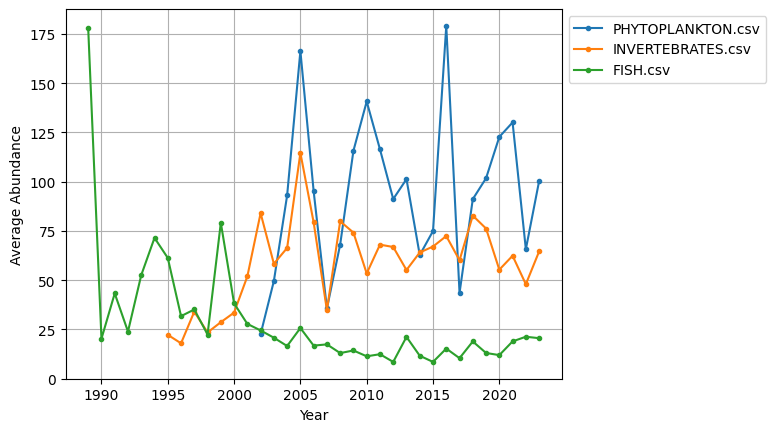

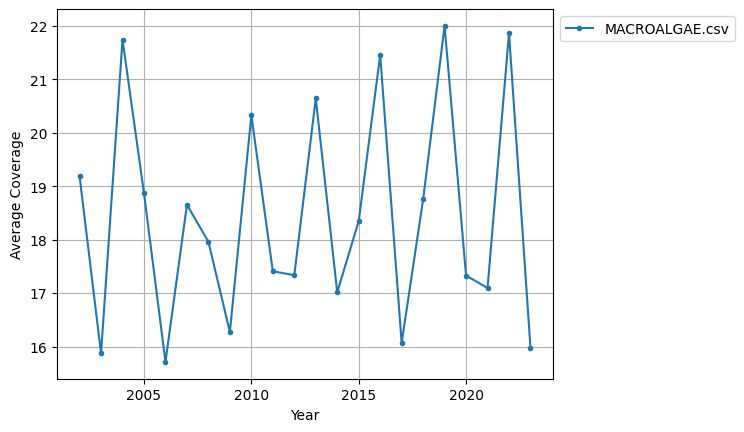

In [8]:
from collections import defaultdict
plots_by_parameter = defaultdict(list)

for name, df in dataframes.items():
    datecollected_column = f"{name}/datecollected"
    parameter_value_column = f"{name}/parameter_value"
    sheet_name = name.split("/")[-1]

    parameter = df[f"{name}/parameter"].unique()
    assert(parameter.size == 1)
    parameter = parameter[0].decode("utf-8")

    df["yearcollected"] = df[datecollected_column].dt.year
    grouped = df.groupby("yearcollected", as_index=False).mean(numeric_only=True)
    plots_by_parameter[parameter].append({
        "x": grouped["yearcollected"],
        "y": grouped[parameter_value_column],
        "kwargs": {
            "marker": ".",
            "label": sheet_name
        }
    })

for parameter, plots in plots_by_parameter.items():
    plt.figure()
    for plot in plots:
        plt.plot(plot["x"], plot["y"], **plot["kwargs"])
        plt.ylabel(f"Average {parameter}")
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.xlabel("Year")

## 6. Conclusion
Summarize key findings and observations from the dataset exploration.

In this notebook, we successfully loaded and explored a dataset using the `mlcroissant` library. We reviewed the available record sets and fields, extracted data into a DataFrame, and performed basic exploratory data analysis. Key findings include the distribution patterns of parameter values and insights into site-specific data groupings. This analysis provides a foundation for further in-depth research and data modeling.